In [12]:
from sklearn import datasets
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **FUNCTIONS**

In [13]:
# Input
# n_comps: number of principal components
# X: dataset

# Output
# pcs: principal components
# exp_var: explained variance
# scores: transformed data (principal component scores)

def generate_pcs(n_comps, X):

    # standardize the dataset
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    # covariance matrix computation
    cov = (X_scaled.T @ X_scaled) / (X_scaled.shape[0] - 1)

    # calculates eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eig(cov)
    
    # sort principal components
    idx = np.argsort(eig_values, axis=0)[::-1]
    sorted_eig_vectors = eig_vectors[:, idx]
    
    # calculates explained variance
    exp_var = eig_values[idx] / np.sum(eig_values[idx])

    # determine how many principal components to select
    idx = np.arange(n_comps)
    pcs = sorted_eig_vectors[:, idx]
    
    # recast the data along the principal components axes
    scores = X_scaled @ pcs
    
    return pcs, exp_var[idx], scores
    

* **LOAD DATASET**

In [14]:
dataset = datasets.load_iris()
df_dataset = sns.load_dataset('iris')

* **EXPLORATORY DATA ANALYSIS**

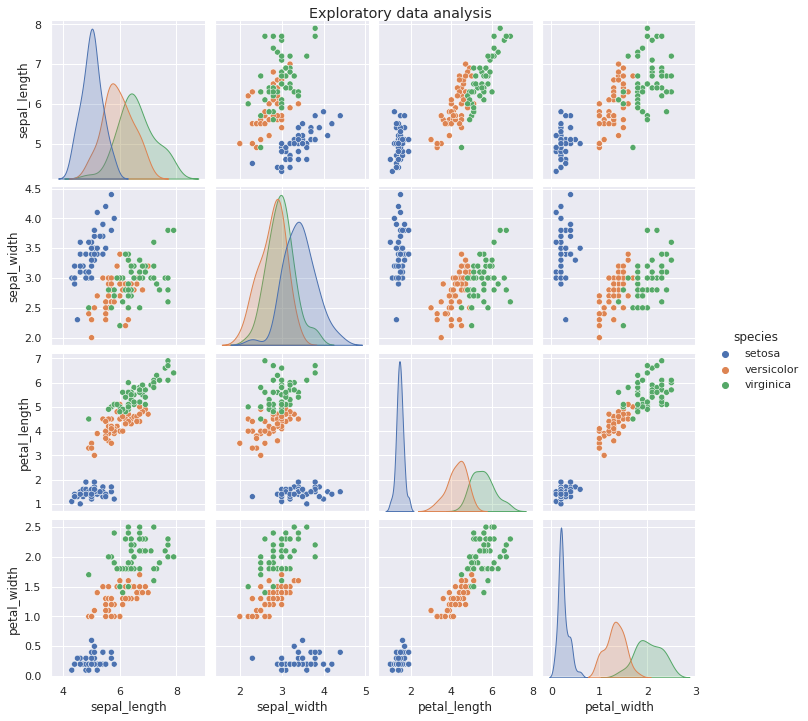

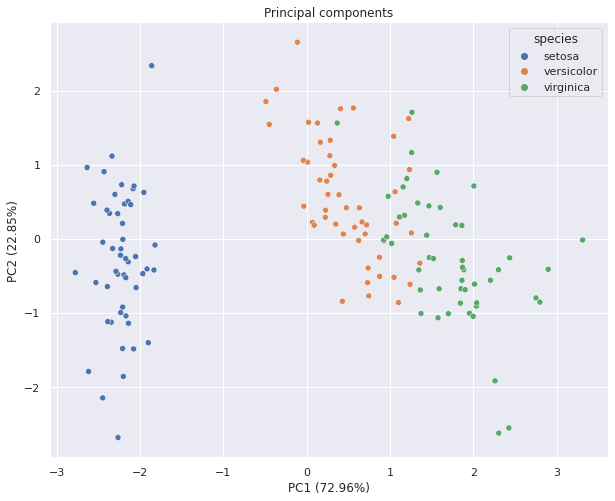

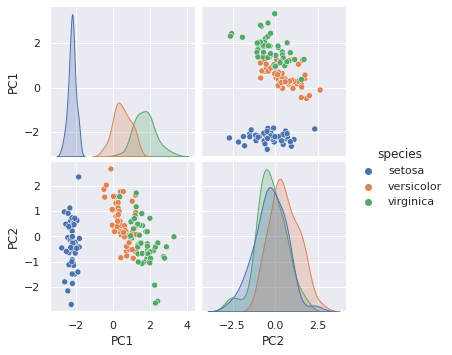

In [28]:
sns.set()

#plt.title('Exploratory data analysis')
p = sns.pairplot(df_dataset, hue='species')
p.fig.suptitle('Exploratory data analysis', y=1.02)

# PCA
pcs, exp_var, scores = generate_pcs(2, dataset['data'])

df_scores = pd.DataFrame(scores, columns=['PC1', 'PC2'])
df_scores['species'] = df_dataset['species']

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_scores, x='PC1', y='PC2', hue='species')
plt.title('Principal components')
plt.xlabel('PC1 ({:.2f}%)'.format(exp_var[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(exp_var[1]*100))

sns.pairplot(df_scores, hue='species')

